# Titanic Random Forest Classifier Example

### Import libraries

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import dtreeviz
import matplotlib.pyplot as plt
import pandas as pd

### Load titanic dataset

In [2]:
passenger_dataframe = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
passenger_dataframe.head()

Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500

## Encode string characters for scikit learn

In [3]:
full_df = pd.get_dummies(passenger_dataframe)
#full_df

## Let's choose which features to use

In [4]:
features = ['Sex_female','Sex_male','Fare','Age','Pclass']
X = full_df.loc[:, features]
X.head()

Sex_female  Sex_male     Fare   Age  Pclass
0           0         1   7.2500  22.0       3
1           1         0  71.2833  38.0       1
2           1         0   7.9250  26.0       3
3           1         0  53.1000  35.0       1
4           0         1   8.0500  35.0       3

### Lets set if this person survived or not, this is what we'll predict

In [5]:
y = passenger_dataframe.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Let's create a random forest with 100 trees

In [6]:
rf_n_estimators = 100 #100 trees will be created
rf_depth= 4 #4 decision nodes per tree
model = RandomForestClassifier(n_estimators=rf_n_estimators, random_state=1, max_depth=rf_depth) #define the model
model.fit(X, y) #Train/fit the model, map the passenger's features (X) to the survival (y)
predicted = model.predict(X) #Use the model to predict 
passenger_dataframe['predict'] = predicted #add the new predictions to the initial passenger dataframe

## Inspect first tree

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


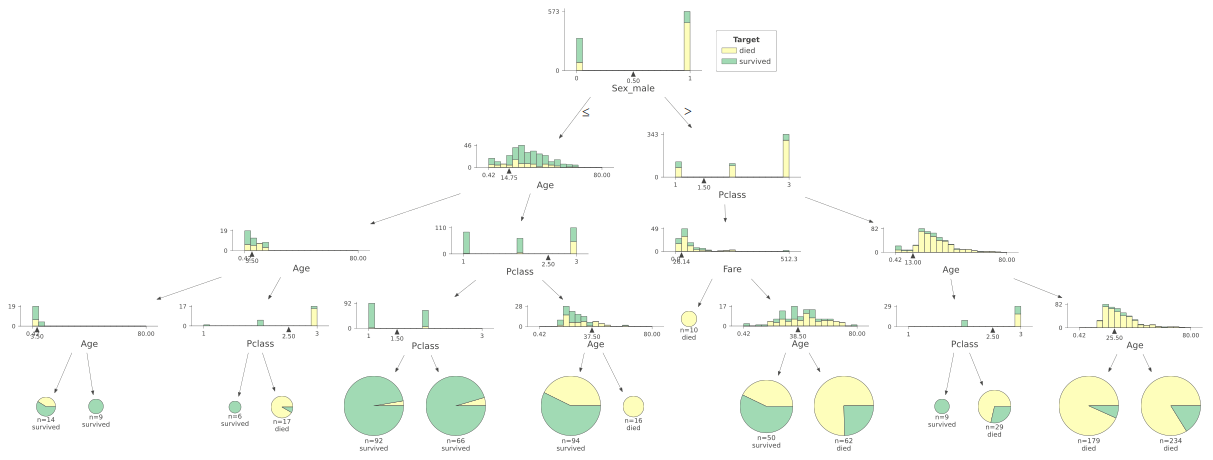

In [7]:
viz = dtreeviz.model(model.estimators_[0], X, y, feature_names=X.columns,class_names=["died", "survived"], target_name="Target")
viz.view()

## Notes about this project

This was a simple example of how to run scikit-learn's Random Forest on JetML. Easily adapt this project to your own dataset and build out your full ML workflow. 